<a href="https://colab.research.google.com/github/alexlopespereira/machine_learning/blob/main/Notebooks/Aula1/Aula1_04_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação MNIST com scikit-learn

Este notebook demonstra como classificar dígitos manuscritos do dataset MNIST usando **scikit-learn**.
Usaremos a função `fetch_openml` para baixar o MNIST, pré-processar os dados, treinar um `MLPClassifier`,
avaliar seu desempenho e visualizar algumas previsões.

In [ ]:
# ETAPA 0: IMPORTAR BIBLIOTECAS (Compartilhado para todas as etapas)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## ETAPA 1: Baixar o Dataset MNIST

Usaremos `fetch_openml` para baixar o dataset MNIST, que contém 70.000 imagens de dígitos manuscritos (0–9).
Cada imagem possui 28×28 pixels, achatadas em um vetor de 784 dimensões.

In [ ]:
print("Baixando o dataset MNIST...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print("Download concluído.")

print("Formato de X:", X.shape)
print("Formato de y:", y.shape)

## ETAPA 2: Converter os rótulos de string para inteiro

Por padrão, o `fetch_openml` pode carregar os rótulos como strings. Vamos convertê-los para `uint8` (0–255)
para que funcionem melhor com as funções numéricas do scikit-learn.

In [ ]:
y = y.astype(np.uint8)
print("Rótulos convertidos para inteiros. Exemplo de rótulos:", y[:10])

## ETAPA 3: Dividir em Conjuntos de Treino e Teste

Vamos dividir as 70.000 imagens em 60.000 para treino e 10.000 para teste,
usando `train_test_split` com um `random_state` fixo para reprodutibilidade.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=10000,     # 10.000 imagens no conjunto de teste
    random_state=42
)

print("Tamanho do conjunto de treino:", X_train.shape[0])
print("Tamanho do conjunto de teste:", X_test.shape[0])

## ETAPA 4: Normalizar (Escalonar) os Valores de Pixel

Cada valor de pixel atualmente varia de 0 a 255. Vamos normalizar os dados
dividindo por 255.0, para que os valores de pixel fiquem no intervalo [0, 1].

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Dados normalizados. Exemplo de valores de pixel na primeira amostra de treino:")
print(X_train[0][:20])  # mostra os primeiros 20 pixels da primeira imagem de treino

## ETAPA 5: Criar o MLPClassifier

Vamos criar um Perceptron Multicamadas (Multi-Layer Perceptron) simples com uma única camada oculta de 128 neurônios.
Usamos:
- `activation='relu'`
- `solver='adam'`
- `max_iter=10` (épocas)

`verbose=True` exibirá mensagens de progresso durante o treinamento.

### Função de Ativação Relu

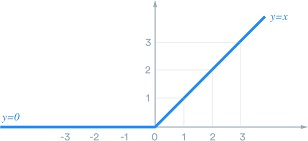

### O Solver adam
Adam (Adaptive Moment Estimation) combina duas características importantes:

*   Ajusta automaticamente a taxa de aprendizado (learning rate) para cada parâmetro
*   Utiliza médias móveis dos gradientes para melhorar a convergência


    


In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='adam',
    max_iter=10,
    verbose=True,
    random_state=42
)

print("MLPClassifier criado:", mlp)

## ETAPA 6: Treinar (Fit) o Modelo

Agora, vamos treinar (fit) o MLPClassifier com o conjunto de treino. Esse processo pode demorar um pouco, dependendo do hardware.

In [ ]:
print("Treinando o MLPClassifier...")
mlp.fit(X_train, y_train)
print("Treinamento concluído.")

## ETAPA 7: Avaliar o Modelo

Fazemos a previsão dos rótulos do conjunto de teste e, em seguida, medimos a acurácia usando `accuracy_score`.

In [ ]:
y_pred = mlp.predict(X_test) # O que é o argumento desta função? O que é o resultado? Qual o tipo e o shape da entrada e da saída?
test_accuracy = accuracy_score(y_test, y_pred)

print("Acurácia no teste:", test_accuracy)

## ETAPA 8: Visualizar Algumas Previsões

Por fim, vamos exibir algumas imagens do conjunto de teste, juntamente com as previsões do modelo.
Selecionaremos algumas imagens aleatórias e compararemos o rótulo previsto com o rótulo verdadeiro.

In [ ]:
num_images_to_show = 5
indices = np.random.choice(len(X_test), num_images_to_show, replace=False)

for i, idx in enumerate(indices):
    image = X_test[idx].reshape(28, 28)
    prediction = mlp.predict(X_test[idx].reshape(1, -1))[0]

    plt.figure(figsize=(2,2))
    plt.imshow(image, cmap='gray')
    plt.title(f"Previsto: {prediction}, Verdadeiro: {y_test[idx]}")
    plt.axis('off')
    plt.show()

## Conclusão

- Baixamos o dataset MNIST usando `fetch_openml`.
- Pré-processamos os dados normalizando os valores de pixel.
- Treinamos um MLPClassifier simples em 60.000 amostras.
- Obtivemos uma acurácia de teste (geralmente acima de 94%).
- Visualizamos as previsões do modelo em algumas amostras de teste.

**Próximos Passos**: Você pode experimentar diferentes arquiteturas de MLP (por exemplo, múltiplas camadas ocultas),
mudar o número de neurônios ou ajustar hiperparâmetros como `solver`, `max_iter` e `learning_rate_init`.
Também pode explorar outros datasets, como **Fashion-MNIST** ou **CIFAR-10**,
para praticar tarefas de classificação de imagens mais complexas.